## Libraries

In [22]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

## Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Check if there are missing values
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

### Import Segmentation Model

In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [7]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [8]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization

In [9]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [10]:
# Apply pca on the purchase data and obtain 3 principal components for each row in the table. 
# It will be containing duplicates.
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [11]:
# Based on the principal components, use the predict method from pca to segment the purchase data into the four segment.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [12]:
# Copy resulting data frame as a purchase predictors data frame. 
# There will be change in the predictors data frame, (adding and changing columns). Therefore, keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [13]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

### Data Analysis by Customer

In [15]:
# Create data frame with one record per individual. Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
# Set index to ID
temp1 = temp1.set_index('ID')
# Change the name of 'Incidence' to 'N_Visits'
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [16]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
# Set index to ID
temp2 = temp2.set_index('ID')
# Change the name of 'Incidence' to 'N_Purchases'
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp2

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13
...,...
200000496,20
200000497,43
200000498,39


In [17]:
# Join tables temp1 and temp2
temp3 = temp1.join(temp2)
temp3

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [18]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [20]:
# Obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1
...,...,...,...,...
200000496,120,20,0.166667,0
200000497,120,43,0.358333,2
200000498,131,39,0.297710,0


### Segment Proportions

In [21]:
# Calculate the proportions of each segment and set the appropriate column name. 
# df_purchase_descr.shape[0] == No. of observations
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

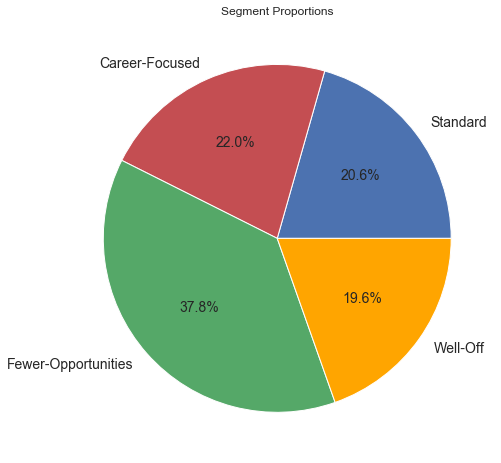

In [26]:
# Visualization: Pie chart
plt.figure(figsize = (10,8))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%',
        colors = ('b', 'r', 'g', 'orange'),
        textprops = {'fontsize': 14})
plt.title('Segment Proportions')